In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import datetime
import time

In [47]:
###############################################################################
###############################################################################

# To get graphs, only change the following values

###############################################################################

#Location of folder with data
dataLoc = r''
#Name of folder with data (Must be in original Zephyr format: YYYY_MM_DD-HH_MM_SS)
folderName = r'' 

# 
date = "1000/09/30" # format: "YYYY/MM/DD"
startTime = "12:00" # format: "HH:MM" (military time)
endTime = "12:00"   # format: "HH:MM" (military time)

getBreathingRate = True # (Bool) Whether to return BR graph 
saveBRplot = True      # (Bool) Whether to save BR graph
getHeartRate = True   # (Bool) Whether to return HR graph
saveHRplot = True      # (Bool) Whether to save HR graph

saveLocation = '' # Name of output location
saveBRName = ""                   # Name of Breathing Rate output file
saveHRName = ""                   # Name of Heart Rate output file

################################################################################
################################################################################

In [48]:
# Converts "day/month/year hours:minutes:seconds.milliseconds" to just an aggregate number of seconds
# !Breaks if data covers from multiple days!
# To do: Adapt to multiple day use
def convertTimeToSecs(timeString):
    splitTime = timeString.split(':')
    totalSecs = int(splitTime[0]) * 3600 + int(splitTime[1]) * 60 + float(splitTime[2])
    return totalSecs

def convertHoursToSecs(timeString):
    splitTime = timeString.split(':')
    totalSecs = int(splitTime[0]) * 3600 + int(splitTime[1]) * 60
    return totalSecs

In [49]:
fullPath = dataLoc + folderName + folderName
summaryFile = fullPath + r'_Summary.csv'

# Import data as pandas dataframes
summary_csv = pd.read_csv(summaryFile)
HR_data = summary_csv[['Time', 'HR']]
BR_data = summary_csv[['Time', 'BR']]

In [50]:
def checkTimeBounds(data, startTime, endTime):
    lowBound = data.values[0][0].split(' ')[1].split('.')[0].rsplit(':',1)[0]
    highBound = data.values[len(data)-1][0].split(' ')[1].split('.')[0].rsplit(':',1)[0]
    if (convertHoursToSecs(startTime) < convertHoursToSecs(lowBound)) or (convertHoursToSecs(highBound) < convertHoursToSecs(endTime)):
        sys.exit("Invalid time bounds")
        
checkTimeBounds(HR_data, startTime, endTime)

In [51]:

newFrame = HR_data['Time'].str.split(" ", n = 1, expand=True)
HR_data["HH:MM"] = newFrame[1].str.rsplit(":", n = 1, expand=True)[0]
newFrame = HR_data["HH:MM"].apply(convertHoursToSecs)
HR_data["hourStamp"] = newFrame

HR_data = HR_data[(HR_data["hourStamp"] >= convertHoursToSecs(startTime)) & (HR_data["hourStamp"] <= convertHoursToSecs(endTime))]

newFrame = BR_data['Time'].str.split(" ", n = 1, expand=True)
BR_data["HH:MM"] = newFrame[1].str.rsplit(":", n = 1, expand=True)[0]
newFrame = BR_data["HH:MM"].apply(convertHoursToSecs)
BR_data["hourStamp"] = newFrame

BR_data = BR_data[(BR_data["hourStamp"] >= convertHoursToSecs(startTime)) & (HR_data["hourStamp"] <= convertHoursToSecs(endTime))]

print(HR_data)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

                         Time  HR  HH:MM  hourStamp
1891  05/09/2019 11:52:00.437  67  11:52      42720
1892  05/09/2019 11:52:01.437  69  11:52      42720
1893  05/09/2019 11:52:02.437  70  11:52      42720
1894  05/09/2019 11:52:03.437  72  11:52      42720
1895  05/09/2019 11:52:04.437  73  11:52      42720
1896  05/09/2019 11:52:05.437  72  11:52      42720
1897  05/09/2019 11:52:06.437  71  11:52      42720
1898  05/09/2019 11:52:07.437  69  11:52      42720
1899  05/09/2019 11:52:08.437  67  11:52      42720
1900  05/09/2019 11:52:09.437  66  11:52      42720
1901  05/09/2019 11:52:10.437  66  11:52      42720
1902  05/09/2019 11:52:11.437  66  11:52      42720
1903  05/09/2019 11:52:12.437  68  11:52      42720
1904  05/09/2019 11:52:13.437  68  11:52      42720
1905  05/09/2019 11:52:14.437  67  11:52      42720
1906  05/09/2019 11:52:15.437  68  11:52      42720
1907  05/09/2019 11:52:16.437  70  11:52      42720
1908  05/09/2019 11:52:17.437  69  11:52      42720
1909  05/09/

In [52]:
def removeBROutlierData(BRClean = False):
    maxBRThreshold = 50
    if BRClean:
        print("Cleaning BR data")
        for row in range(len(BR_data['BR'])):
            if BR_data.iloc[row]['BR'] > maxBRThreshold:
                BR_data['BR'][row] = 0
                        
removeBROutlierData(getBreathingRate)


Cleaning BR data


Average Heart Rate = 71.42962962962963


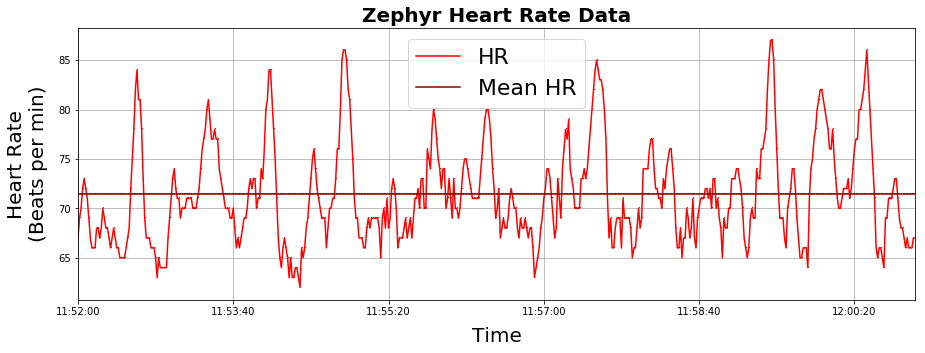

In [53]:
# Plot
if getHeartRate: 
    HR_data["Mean HR"] = HR_data['HR'].mean()
    HR_data["HH:MM:SS"] = HR_data['Time'].str.split(" ", n=1, expand=True)[1].str.rsplit(".", n=1, expand=True)[0]
    print("Average Heart Rate = " + str(HR_data["Mean HR"].iloc[0]))
    HR_data.plot(kind='line', x='HH:MM:SS', y = ['HR','Mean HR'], marker=',', color=['red', 'darkred'],  figsize=(15,5))#, ax=ax)
    plt.ylabel("Heart Rate\n(Beats per min)", size = 15, rotation = 0, labelpad = 50)
    plt.title("Zephyr Hear Rate Data", size=20)
    plt.ylabel("Heart Rate\n(Beats per min)", size = 20, rotation = 90, labelpad = 10)
    plt.xlabel("Time", size = 20, rotation = 0, labelpad = 10)
    plt.grid()
    plt.title("Zephyr Heart Rate Data", size=20, weight= 'bold')
    plt.legend(prop={'size':22, 'weight': 'normal'})
    if saveHRplot:
        plt.savefig(saveLocation + saveHRName, bbox_inches='tight')
    plt.show()


Average Breathing Rate = 14.609629629629612


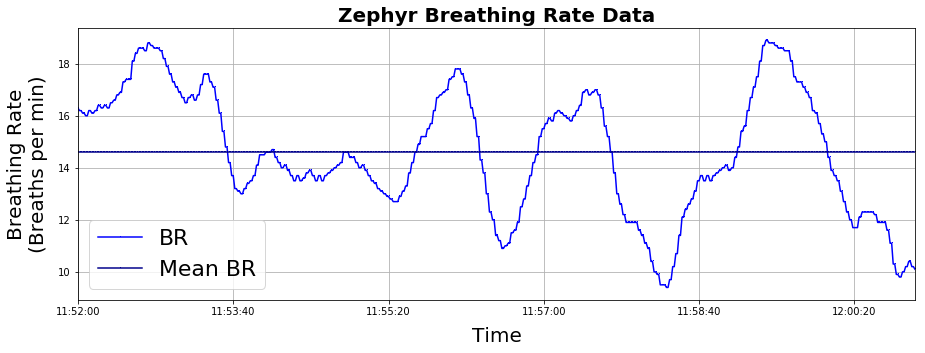

In [54]:
if getBreathingRate:
    BR_data["Mean BR"] = BR_data['BR'].mean()
    BR_data["HH:MM:SS"] = BR_data['Time'].str.split(" ", n=1, expand=True)[1].str.rsplit(".", n=1, expand=True)[0]
    print("Average Breathing Rate = " + str(BR_data["Mean BR"].iloc[0]))
    if graphTargetBR:
        BR_data["Target BR"] = targetBR
        BR_data.plot(kind='line', x='HH:MM:SS', y = ['BR','Mean BR', 'Target BR'], marker=',', color=['blue', 'darkblue', 'red'],  figsize=(15,5))#, ax=ax)
    else:
        BR_data.plot(kind='line', x='HH:MM:SS', y = ['BR','Mean BR'], marker=',', color=['blue', 'darkblue'],  figsize=(15,5))#, ax=ax)

    plt.ylabel("Breathing Rate\n(Breaths per min)", size = 20, rotation = 90, labelpad = 10)
    plt.xlabel("Time", size = 20, rotation = 0, labelpad = 10)
    plt.title("Zephyr Breathing Rate Data", weight='bold',size=20)
    plt.legend(prop={'size':22, 'weight': 'normal'})
    plt.grid()
    if saveBRplot:
        plt.savefig(saveLocation + saveBRName, bbox_inches='tight')
    plt.show()


## 